In [22]:
#Nguyễn Gia Bảo 19146083

In [23]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
import numpy as np 
import os 
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_path = '/content/drive/MyDrive/Money'
valid_path = '/content/drive/MyDrive/Money'
test_path = '/content/drive/MyDrive/Money'


In [26]:
# Data generators
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)



train_batches = train_datagen.flow_from_directory(
        # This is the target directory
        train_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_batches = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')


test_batches = test_datagen.flow_from_directory(
        # This is the target directory
        test_path,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=10,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 110 images belonging to 11 classes.
Found 110 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [27]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [28]:
imgs, labels = next(train_batches)

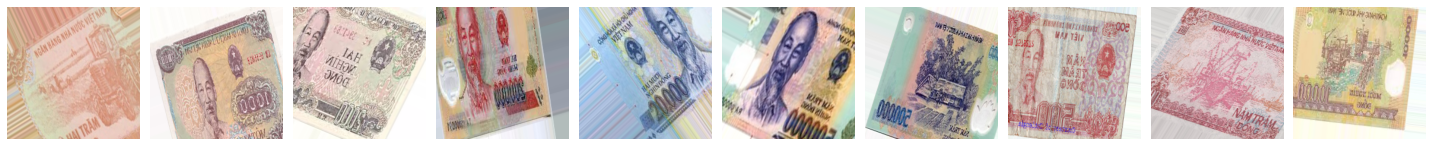

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [29]:

plotImages(imgs)
print(labels)

In [30]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Flatten(),
    Dropout(0.5),
    Dense(units=11, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [31]:

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=train_batches,steps_per_epoch=len(train_batches),validation_data=validation_batches,validation_steps=len(validation_batches), epochs=30, verbose=1)

Epoch 1/30
11/11 [==============================] - 3s 252ms/step - loss: 2.5961 - accuracy: 0.0727 - val_loss: 2.3961 - val_accuracy: 0.0909
Epoch 2/30
11/11 [==============================] - 3s 235ms/step - loss: 2.4008 - accuracy: 0.0636 - val_loss: 2.3953 - val_accuracy: 0.1455
Epoch 3/30
11/11 [==============================] - 2s 230ms/step - loss: 2.3924 - accuracy: 0.1091 - val_loss: 2.3606 - val_accuracy: 0.1000
Epoch 4/30
11/11 [==============================] - 3s 231ms/step - loss: 2.3292 - accuracy: 0.0909 - val_loss: 2.3452 - val_accuracy: 0.0909
Epoch 5/30
11/11 [==============================] - 2s 226ms/step - loss: 2.1790 - accuracy: 0.1455 - val_loss: 2.0529 - val_accuracy: 0.2000
Epoch 6/30
11/11 [==============================] - 3s 234ms/step - loss: 2.0530 - accuracy: 0.2364 - val_loss: 1.8238 - val_accuracy: 0.3545
Epoch 7/30
11/11 [==============================] - 3s 231ms/step - loss: 1.8925 - accuracy: 0.2818 - val_loss: 1.5724 - val_accuracy: 0.4364
Epoch 

In [32]:
model.save('tien.h5')



In [33]:
import shutil
shutil.copy('/content/tien.h5','/content/drive/MyDrive/Money')

'/content/drive/MyDrive/Money/tien.h5'

In [34]:
from keras.models import load_model

model5 = load_model('tien.h5')

(1, 224, 224, 3)

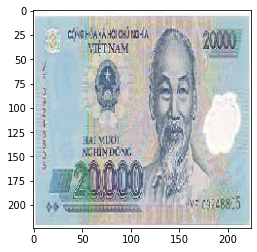

In [78]:
from keras.preprocessing.image import load_img,img_to_array
img=load_img('/content/download.jpg',target_size=(224,224))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,224,224,3)
img=img.astype('float32')
img=img/255
img.shape

In [79]:
a=np.argmax(model5.predict(img),axis=1)

if a == 0 :
  print('200 dong')
elif a == 1:
  print('500 dong')
elif a == 2:
  print('1k')
elif a == 3:
  print('2k')
elif a == 4:
  print('5k')
elif a == 5:
  print('10k')
elif a == 6:
  print('20k')
elif a == 7:
  print('50k')
elif a == 8:
  print('100k')
elif a == 9 :
  print('200k')  
else :
  print ('500k') 

10k
